<center>
    <img src="https://www.digitale-hauptstadtregion.de/wp-content/uploads/2019/07/AI_Mikrosensorik_500px.jpg" width="600" alt="cognitiveclass.ai logo"  />
</center>

# SemArt project

INFM2100 - Aktuelle Themen der Softwareentwicklung - WS22

### Required settings

In [1]:
!pip install --upgrade pip -q  

In [2]:
!pip install pymilvus -q

In [3]:
!pip install grpcio>=1.47.2 -q

In [4]:
!pip install transformers -q

In [5]:
!pip install opencv-python -q

### Importing Needed libraries and packages
**Transformers** transformers can be used to clean, reduce, expand or generate features. The fit method learns parameters from a training set and the transform method applies transformations to unseen data.

**NumPy** is a Python library used for working with arrays.

**PIL** Python Imaging Library (expansion of PIL) is the de facto image processing package for editing, creating and saving images.


In [6]:
import transformers
import numpy as np
from PIL import Image

**Pandas** is a Python package for doing practical, real-world data analysis .

**Plotly.express** is the easy-to-use, high-level interface to Plotly, which operates on a variety of types of data and produces easy-to-style figures.

**Matplotlib** is a library for data visualization, typically in the form of plots, graphs and charts and **pyplot** is an API (Application Programming Interface) for Python's matplotlib

In [7]:
from pymilvus import connections, utility
from pymilvus import Collection, CollectionSchema, FieldSchema, DataType
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt


### Read CSV file 
- **Read_csv** function is used to read csv_file
- Using **head** function the first four rows of data is shown

In [8]:
semart_train = pd.read_csv("semart_train.csv",delimiter="\t",encoding="latin")
semart_train.head(4)

IMAGE_FILE                                        DESCRIPTION  \
0   19873-1darmst.jpg  The Meyer or Darmstadt Madonna is the last, mo...   
1  18759-guard301.jpg  Whereas Canaletto incorporates classically ins...   
2  04589-temptati.jpg  In this painting the refinement of the colouri...   
3      15104-magi.jpg  The left side of the painting was cut, origina...   

                      AUTHOR                                 TITLE  \
0  HOLBEIN, Hans the Younger                     Darmstadt Madonna   
1          GUARDI, Francesco     Landscape with a Fisherman's Tent   
2         BILIVERT, Giovanni  The Temptation of Charles and Ubalde   
3     GEERTGEN tot Sint Jans                 Adoration of the Magi   

                       TECHNIQUE                 DATE       TYPE  \
0  Oil on limewood, 147 x 102 cm  1526 and after 1528  religious   
1      Oil on canvas, 49 x 77 cm              1770-75  landscape   
2      Oil on copper, 37 x 28 cm              1629-30  religious   
3             Panel, 111 x 69 cm              1480-85  religious   

          SCHOOL  TIMEFRAME  
0         German  1501-1550  
1        Italian  1751-1800  
2        Italian  1601-1650  
3  Netherlandish  1451-1500

### Shape function
The function "shape" returns the shape of an array. A tuple with the number of elements per axis (dimension).

In [9]:
semart_train.shape

(19244, 9)

### Data analysis
**Describe() function** is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

In [10]:
semart_train.describe()

IMAGE_FILE                                        DESCRIPTION  \
count               19244                                              19244   
unique              19244                                              18339   
top     19873-1darmst.jpg  The picture shows the fresco before the restor...   
freq                    1                                                 34   

                   AUTHOR       TITLE TECHNIQUE   DATE       TYPE   SCHOOL  \
count               19244       19244     19244  19244      19244    19244   
unique               3166       13591     12297   3009         10       26   
top     GOGH, Vincent van  Still-Life    Fresco      -  religious  Italian   
freq                  291         210      1798   2139       7481     8011   

        TIMEFRAME  
count       19244  
unique         22  
top     1601-1650  
freq         3404

### Visual display
**Plotly.express(sunburst)** is used to draw type and school diagram using color separation.
Each color indicates how many schools of one type there are.


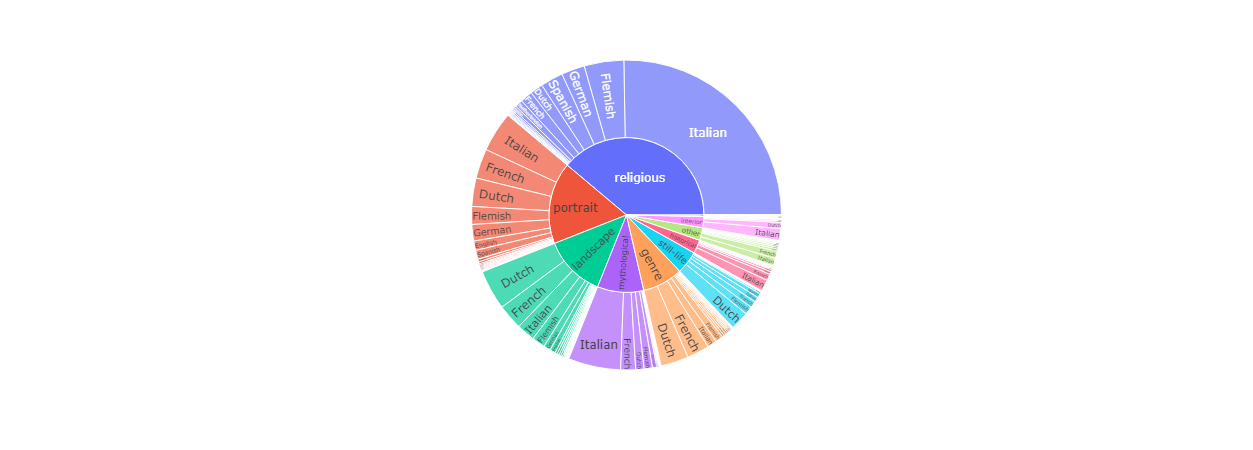

In [11]:
px.sunburst(semart_train,path=["TYPE","SCHOOL"],height=450)

### Using loop for_each will get values of school_column without repetition

In [12]:
listOfSchools = []
for each in semart_train["SCHOOL"]:
    if each in listOfSchools:
        pass
    else:
        listOfSchools.append(each)
print(listOfSchools)    

['German', 'Italian', 'Netherlandish', 'Dutch', 'Spanish', 'Flemish', 'French', 'Russian', 'Polish', 'English', 'Danish', 'Austrian', 'Irish', 'Other', 'Bohemian', 'Catalan', 'Hungarian', 'Scottish', 'Swiss', 'Belgian', 'American', 'Greek', 'Swedish', 'Norwegian', 'Finnish', 'Portuguese']


### School_column contains the names of different countries
Because of milvus_server_error every country is changed to an integer code.

The order of the countries and their numbers is as follows:
- German = 1, Italian = 2, Netherlandish = 3, Dutch = 4, Spanish = 5, Flemish = 6, French = 7, 
- Russian = 8, Polish = 9, English = 10, Danish = 11, Austrian = 12, Irish = 13, Other = 14, 
- Bohemian = 15, Catalan = 16, Hungarian = 17, Scottish = 18, Swiss = 19, Belgian = 20,
- American = 21, Greek = 22, Swedish = 23, Norwegian = 24, Finnish = 25, Portuguese = 26.

In [13]:
semart_train["SCHOOLS"] =semart_train["SCHOOL"].replace(['German', 'Italian', 'Netherlandish', 'Dutch', 'Spanish', 'Flemish', 'French', 'Russian', 'Polish', 'English', 'Danish', 'Austrian', 'Irish', 'Other', 'Bohemian', 'Catalan', 'Hungarian', 'Scottish', 'Swiss', 'Belgian', 'American', 'Greek', 'Swedish', 'Norwegian', 'Finnish', 'Portuguese'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26])

          SCHOOLS
1          German
2         Italian
3   Netherlandish
4           Dutch
5         Spanish
6         Flemish
7          French
8         Russian
9          Polish
10        English
11         Danish
12       Austrian
13          Irish
14          Other
15       Bohemian
16        Catalan
17      Hungarian
18       Scottish
19          Swiss
20        Belgian
21       American
22          Greek
23        Swedish
24      Norwegian
25        Finnish
26     Portuguese


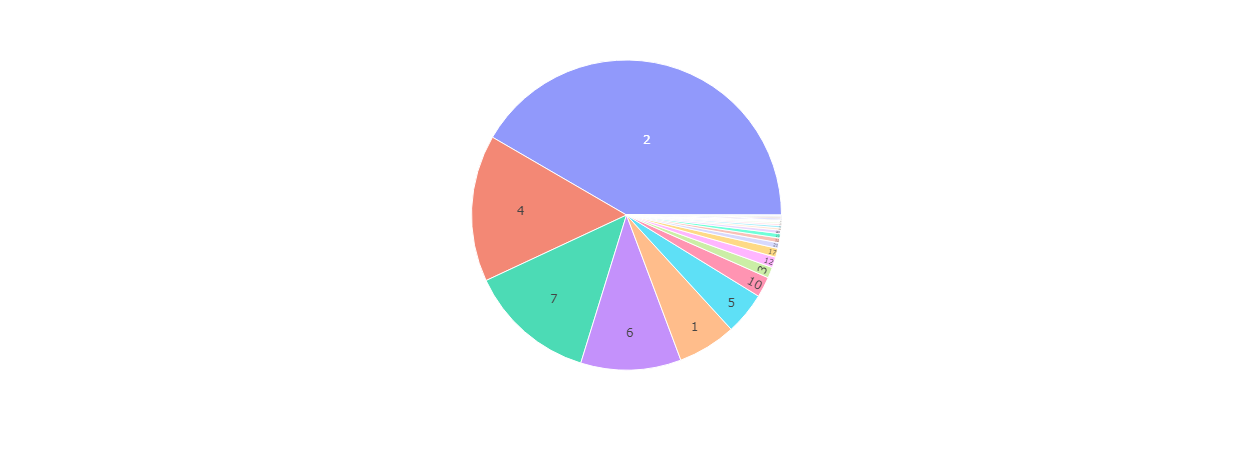

In [14]:
SCHOOLS = ["","German", "Italian", "Netherlandish", "Dutch", "Spanish", "Flemish",
           "French", "Russian", "Polish", "English","Danish","Austrian","Irish",
          "Other","Bohemian","Catalan","Hungarian","Scottish","Swiss","Belgian","American",
          "Greek","Swedish","Norwegian","Finnish","Portuguese"]


df_show_schools = pd.DataFrame(
    dict(SCHOOLS=SCHOOLS)
)
print(df_show_schools[1:])
px.sunburst(semart_train,path=["SCHOOLS"],height=450)

### Using loop for_each will get values of type_column without repetition

In [15]:
listOfTypes = []
for each in semart_train["TYPE"]:
    if each in listOfTypes:
        pass
    else:
        listOfTypes.append(each)
print(listOfTypes)    

['religious', 'landscape', 'other', 'portrait', 'mythological', 'genre', 'interior', 'still-life', 'historical', 'study']


### Type_column contains images with different themes   
Because of milvus_server_error every type is changed to an integer code.

The order of the type and their numbers is as follows:
- religious = 1, landscape = 2, other = 3, portrait = 4, mythological = 5, 
- genre = 6, interior = 7, still-life = 8, historical = 9, study = 10.


In [16]:
semart_train["TYPES"] =semart_train["TYPE"].replace(['religious', 'landscape', 'other', 'portrait', 'mythological', 'genre', 'interior', 'still-life', 'historical', 'study'],[1,2,3,4,5,6,7,8,9,10])

           TYPES
1      religious
2      landscape
3          other
4       portrait
5   mythological
6          genre
7       interior
8     still-life
9     historical
10         study


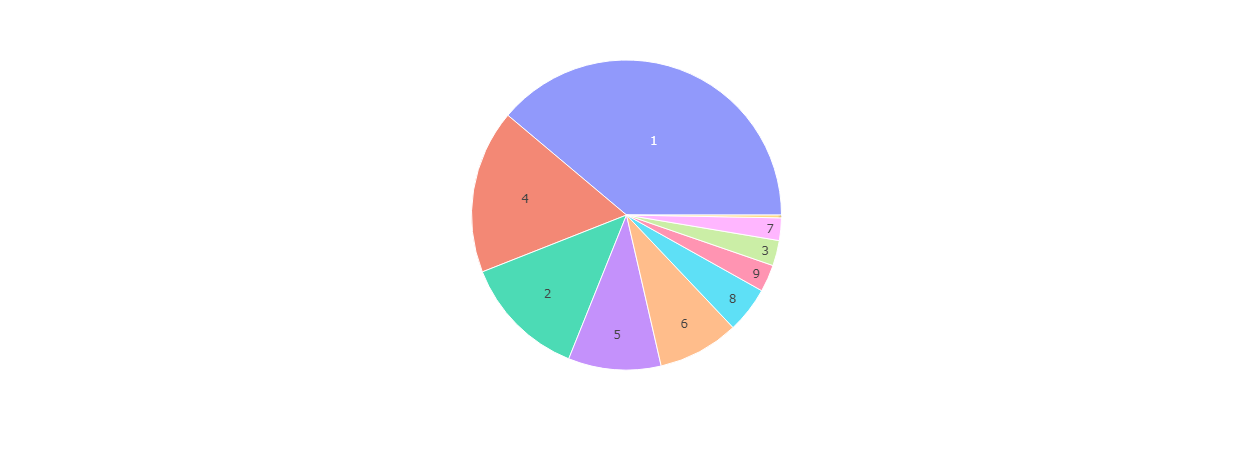

In [17]:
TYPES=['','religious', 'landscape', 'other', 'portrait', 'mythological', 'genre', 'interior', 'still-life', 'historical', 'study']
df_show_Types = pd.DataFrame(
    dict(TYPES=TYPES)
)
print(df_show_Types[1:])
px.sunburst(semart_train,path=["TYPES"],height=450)

### Split TimeFrame Funktion

Timeframe has two values in one column, it makes sense to unpack these two values in two different columns, using **TIMEFRAME.str.split** function

In [18]:
semart_train[["TIMI-MIN","TIME-MAX"]] = semart_train.TIMEFRAME.str.split("-" , expand=True)
semart_train

IMAGE_FILE                                        DESCRIPTION  \
0       19873-1darmst.jpg  The Meyer or Darmstadt Madonna is the last, mo...   
1      18759-guard301.jpg  Whereas Canaletto incorporates classically ins...   
2      04589-temptati.jpg  In this painting the refinement of the colouri...   
3          15104-magi.jpg  The left side of the painting was cut, origina...   
4      36582-paolo_f1.jpg  The painting illustrates a famous episode from...   
...                   ...                                                ...   
19239  07228-canal515.jpg  This picture is a supreme example of a distinc...   
19240  06294-fighting.jpg  Dutch realism was a matter not merely of imita...   
19241  21607-mytholo1.jpg  Lauri's speciality was the ideal landscape wit...   
19242  02815-bacchant.jpg  Augustin was a French miniaturist who revived ...   
19243  35847-fishingb.jpg  Salomon van Ruysdael painted similar views sin...   

                                AUTHOR  \
0            HOLBEIN, Hans the Younger   
1                    GUARDI, Francesco   
2                   BILIVERT, Giovanni   
3               GEERTGEN tot Sint Jans   
4                        SCHEFFER, Ary   
...                                ...   
19239                        CANALETTO   
19240                 BROUWER, Adriaen   
19241                   LAURI, Filippo   
19242  AUGUSTIN, Jean-Baptiste-Jacques   
19243            RUYSDAEL, Salomon van   

                                                   TITLE  \
0                                      Darmstadt Madonna   
1                      Landscape with a Fisherman's Tent   
2                   The Temptation of Charles and Ubalde   
3                                  Adoration of the Magi   
4      The Ghosts of Paolo and Francesca Appear to Da...   
...                                                  ...   
19239  Venice: The Grand Canal from Palazzo Flangini ...   
19240                                  Peasants Fighting   
19241                                   Venus and Adonis   
19242                                        A Bacchante   
19243                           Fishing Boats on a River   

                           TECHNIQUE                 DATE          TYPE  \
0      Oil on limewood, 147 x 102 cm  1526 and after 1528     religious   
1          Oil on canvas, 49 x 77 cm              1770-75     landscape   
2          Oil on copper, 37 x 28 cm              1629-30     religious   
3                 Panel, 111 x 69 cm              1480-85     religious   
4        Oil on canvas, 167 x 234 cm                 1835         other   
...                              ...                  ...           ...   
19239      Oil on canvas, 47 x 78 cm               c.1738     landscape   
19240        Oil on wood, 33 x 49 cm              1631-35         genre   
19241      Oil on copper, 18 x 29 cm                1650s  mythological   
19242          Ivory, diameter: 8 cm                 1799  mythological   
19243        Oil on wood, 38 x 56 cm              1661-63     landscape   

              SCHOOL  TIMEFRAME  SCHOOLS  TYPES TIMI-MIN TIME-MAX  
0             German  1501-1550        1      1     1501     1550  
1            Italian  1751-1800        2      2     1751     1800  
2            Italian  1601-1650        2      1     1601     1650  
3      Netherlandish  1451-1500        3      1     1451     1500  
4              Dutch  1801-1850        4      3     1801     1850  
...              ...        ...      ...    ...      ...      ...  
19239        Italian  1701-1750        2      2     1701     1750  
19240        Flemish  1601-1650        6      6     1601     1650  
19241        Italian  1651-1700        2      5     1651     1700  
19242         French  1751-1800        7      5     1751     1800  
19243          Dutch  1601-1650        4      2     1601     1650  

[19244 rows x 13 columns]

### Value_counts Function 
Calculation of the number of culture types in the school category, using **value_counts** function 

In [19]:
cultures = semart_train.SCHOOL.value_counts()
cultures

Italian          8011
Dutch            2948
French           2556
Flemish          2016
German           1173
Spanish           852
English           411
Netherlandish     217
Austrian          216
Hungarian         178
American          113
Danish             94
Swiss              89
Russian            68
Scottish           46
Belgian            45
Greek              37
Catalan            35
Bohemian           29
Swedish            23
Other              22
Irish              21
Norwegian          18
Polish             16
Finnish             5
Portuguese          5
Name: SCHOOL, dtype: int64

### Culture Diagram
Diagram shows the number of Culture of each country.

This diagram was created using plotly.express library and function_bar
By using this diagram , we can see that Italy's share is more than others by a large margin

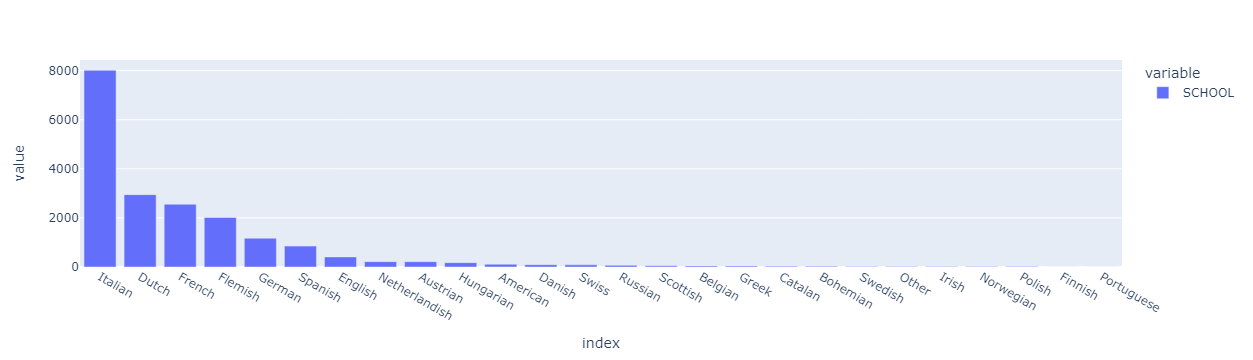

In [20]:
px.bar(cultures)

### Culture Diagram with scatter function
Diagram shows the number of Culture of each country.

This diagram was created using plotly.express library and function_scatter

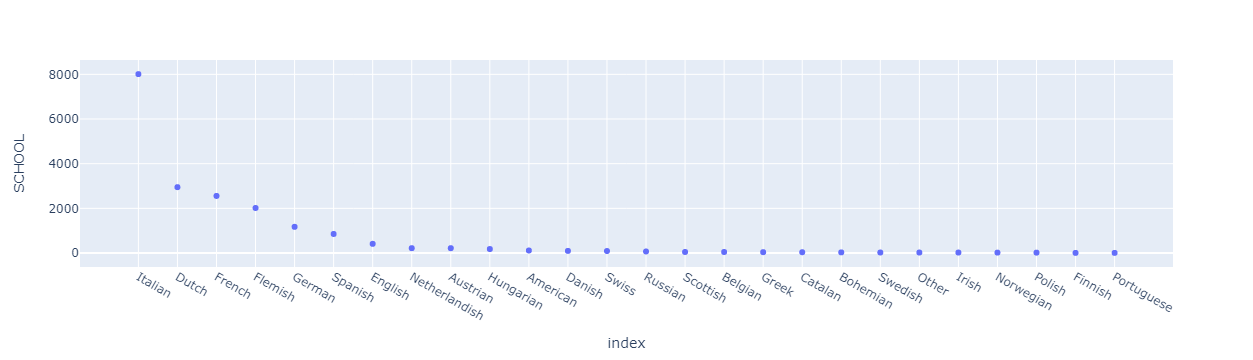

In [21]:
px.scatter(cultures,y="SCHOOL")

### TIME_MAX Diagram 
Diagram shows the number of photo in different TIME_MAX.

This diagram was created using plotly.express library and function_bar.

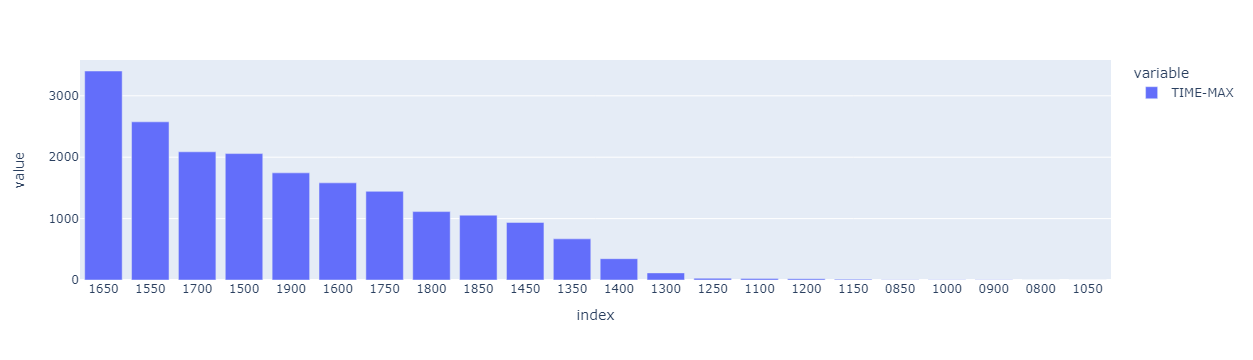

In [22]:
px.bar(semart_train["TIME-MAX"].value_counts())

### Create Model (resnet-50)
- from transformers library AutoFeatureExtractor_package and AutoModel_package are selected
- The resnet-50 model is our model and selected from huggingface


In [23]:
from transformers import AutoFeatureExtractor, AutoModel

selected_model = "microsoft/resnet-50"
model = AutoModel.from_pretrained(selected_model)
extractor = AutoFeatureExtractor.from_pretrained(selected_model)

Some weights of the model checkpoint at microsoft/resnet-50 were not used when initializing ResNetModel: ['classifier.1.bias', 'classifier.1.weight']
- This IS expected if you are initializing ResNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ResNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Connect to milvus server
Make sure a Milvus server is already running

In [24]:
connections.connect(alias='default', host='localhost', port='19530')

### Create a collection
To create new collection, drop collection function must be executed to delete last collection

In [25]:
utility.drop_collection("semart_milvus")

### Load data to milvus
field consists of four variables:
- **pk** is id,
- **type** and **school** as an integer respectively for show type of picture and the country
- **embeddings** to create vectors
- **CollectionSchema** Return the schema of collection.


In [26]:
fields = [
    FieldSchema(name="pk", dtype=DataType.INT64, is_primary=True, auto_id=False),
    FieldSchema(name="type", dtype=DataType.INT64),
    FieldSchema(name="school", dtype=DataType.INT64),
    FieldSchema(name="embeddings", dtype=DataType.FLOAT_VECTOR, dim=2048)
]
schema = CollectionSchema(fields,"semart images")
semart_milvus = Collection("semart_milvus", schema)

### Description package Torch and OS
**Torch:** 
The torch package contains data structures for multi-dimensional tensors and defines mathematical operations over these tensors.

**Os:** 
The OS module in Python provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc. 


In [27]:
import datasets
import torch
import os

### Create new DataFrame (Image_File as row_index) 
IMAGE_FILE_Column is used as index in sm_dataframe

In [28]:
sm = semart_train.set_index('IMAGE_FILE')
sm

DESCRIPTION  \
IMAGE_FILE                                                              
19873-1darmst.jpg   The Meyer or Darmstadt Madonna is the last, mo...   
18759-guard301.jpg  Whereas Canaletto incorporates classically ins...   
04589-temptati.jpg  In this painting the refinement of the colouri...   
15104-magi.jpg      The left side of the painting was cut, origina...   
36582-paolo_f1.jpg  The painting illustrates a famous episode from...   
...                                                               ...   
07228-canal515.jpg  This picture is a supreme example of a distinc...   
06294-fighting.jpg  Dutch realism was a matter not merely of imita...   
21607-mytholo1.jpg  Lauri's speciality was the ideal landscape wit...   
02815-bacchant.jpg  Augustin was a French miniaturist who revived ...   
35847-fishingb.jpg  Salomon van Ruysdael painted similar views sin...   

                                             AUTHOR  \
IMAGE_FILE                                            
19873-1darmst.jpg         HOLBEIN, Hans the Younger   
18759-guard301.jpg                GUARDI, Francesco   
04589-temptati.jpg               BILIVERT, Giovanni   
15104-magi.jpg               GEERTGEN tot Sint Jans   
36582-paolo_f1.jpg                    SCHEFFER, Ary   
...                                             ...   
07228-canal515.jpg                        CANALETTO   
06294-fighting.jpg                 BROUWER, Adriaen   
21607-mytholo1.jpg                   LAURI, Filippo   
02815-bacchant.jpg  AUGUSTIN, Jean-Baptiste-Jacques   
35847-fishingb.jpg            RUYSDAEL, Salomon van   

                                                                TITLE  \
IMAGE_FILE                                                              
19873-1darmst.jpg                                   Darmstadt Madonna   
18759-guard301.jpg                  Landscape with a Fisherman's Tent   
04589-temptati.jpg               The Temptation of Charles and Ubalde   
15104-magi.jpg                                  Adoration of the Magi   
36582-paolo_f1.jpg  The Ghosts of Paolo and Francesca Appear to Da...   
...                                                               ...   
07228-canal515.jpg  Venice: The Grand Canal from Palazzo Flangini ...   
06294-fighting.jpg                                  Peasants Fighting   
21607-mytholo1.jpg                                   Venus and Adonis   
02815-bacchant.jpg                                        A Bacchante   
35847-fishingb.jpg                           Fishing Boats on a River   

                                        TECHNIQUE                 DATE  \
IMAGE_FILE                                                               
19873-1darmst.jpg   Oil on limewood, 147 x 102 cm  1526 and after 1528   
18759-guard301.jpg      Oil on canvas, 49 x 77 cm              1770-75   
04589-temptati.jpg      Oil on copper, 37 x 28 cm              1629-30   
15104-magi.jpg                 Panel, 111 x 69 cm              1480-85   
36582-paolo_f1.jpg    Oil on canvas, 167 x 234 cm                 1835   
...                                           ...                  ...   
07228-canal515.jpg      Oil on canvas, 47 x 78 cm               c.1738   
06294-fighting.jpg        Oil on wood, 33 x 49 cm              1631-35   
21607-mytholo1.jpg      Oil on copper, 18 x 29 cm                1650s   
02815-bacchant.jpg          Ivory, diameter: 8 cm                 1799   
35847-fishingb.jpg        Oil on wood, 38 x 56 cm              1661-63   

                            TYPE         SCHOOL  TIMEFRAME  SCHOOLS  TYPES  \
IMAGE_FILE                                                                   
19873-1darmst.jpg      religious         German  1501-1550        1      1   
18759-guard301.jpg     landscape        Italian  1751-1800        2      2   
04589-temptati.jpg     religious        Italian  1601-1650        2      1   
15104-magi.jpg         religious  Netherlandish  1451-1500        3      1   
36582-paolo

### Read all of the images file from SemArt
- Package **CV2** is imported to convert the black_white images in colorful to solve **RGB_errors**.

- Using a for_loop all data_values has been read
- **sm.index** is unpacked in **ix** and **filename**
- **ix** shows all values that it is used as id and **filename** shows the name of all images
- after executing this code will receive all images with id, type, school and vector (it takes about 3 minute)

In [29]:
import cv2
for ix, filename in enumerate(sm.index):
     if not os.path.exists((f'images/{filename}')):
        continue
     print(ix, end=",")
     #im = Image.open(f'images/{filename}')
     im =  cv2.imread(f'images/{filename}')
     inputs = extractor(images=im, return_tensors="pt")
     with torch.no_grad():
         out = model(**inputs)
     embedding = out.pooler_output.squeeze()
     entities = [
         [ix],
         [sm.TYPES[ix]],
         [sm.SCHOOLS[ix]],
         [list(embedding.numpy())]
     ]
     insert_result = semart_milvus.insert(entities)

5,9,30,41,58,64,67,68,81,86,95,138,140,172,175,181,207,219,233,238,263,270,273,281,283,286,316,321,335,340,353,356,376,384,394,402,412,425,441,471,478,491,551,583,585,589,599,610,612,669,728,739,744,745,791,794,800,845,872,895,899,906,912,930,994,1023,1037,1061,1077,1087,1115,1116,1155,1175,1202,1245,1252,1266,1275,1276,1281,1291,1295,1301,1343,1344,1377,1410,1416,1417,1424,1426,1437,1457,1464,1473,1481,1493,1496,1498,1521,1542,1566,1572,1632,1635,1657,1678,1689,1702,1710,1727,1746,1757,1761,1775,1814,1817,1827,1854,1909,1912,1938,1957,1965,1975,1991,2003,2018,2033,2069,2090,2121,2169,2274,2276,2318,2330,2339,2390,2396,2404,2463,2466,2521,2524,2526,2558,2561,2586,2595,2666,2681,2707,2715,2721,2754,2775,2781,2787,2792,2793,2818,2822,2851,2856,2861,2865,2876,2932,2948,2955,2996,3003,3006,3016,3049,3060,3097,3100,3116,3141,3146,3153,3159,3191,3193,3195,3201,3206,3221,3228,3230,3231,3243,3258,3279,3287,3292,3311,3331,3333,3335,3341,3343,3345,3374,3385,3401,3436,3446,3473,3478,3491,3514,351

### Select desired photo (optimal)
By using this code the user selects desired image from images directory, and copies here the name of the image, and gets back its vector, and can get selected image as a sample.

In [30]:
for ix, filename in enumerate(sm.index):
     if filename== "00388-09mary_c.jpg":
             print(ix, end=" --> our selected photo for comparison ")
             im = Image.open(f'images/{filename}') 
             inputs = extractor(images=im, return_tensors="pt")
             with torch.no_grad():
                 out = model(**inputs)
             embedding = out.pooler_output.squeeze()
             entities = [
                 [ix],
                 [sm.TYPES[ix]],
                 [sm.SCHOOLS[ix]],
                 [list(embedding.numpy())]
              
             ]
             insert_result = semart_milvus.insert(entities)

11201 --> our selected photo for comparison 

### metric = L2 as scale (recommended)

**nlist** Number of cluster units

In [31]:
#metric = 'IP'
metric = 'L2'
index = {
    "index_type": "IVF_FLAT",
    "metric_type": metric,
    "params": {"nlist": 50},
}
semart_milvus.create_index("embeddings", index)

Status(code=0, message='')

### Upload information on Milvus_Server

In [32]:
semart_milvus.load()

### Show the selected Photo
- The photo selected by the user will be resized and with informationen displayed.
- in section **(Select desired photo)** we can get id

IMAGE_FILE                                    00388-09mary_c.jpg
DESCRIPTION    The painting was executed after an engraving o...
AUTHOR                                       ALTDORFER, Albrecht
TITLE                                        Mary with the Child
TECHNIQUE                                   Wood, 49,4 x 35,5 cm
DATE                                                     1520-25
TYPE                                                   religious
SCHOOL                                                    German
TIMEFRAME                                              1501-1550
SCHOOLS                                                        1
TYPES                                                          1
TIMI-MIN                                                    1501
TIME-MAX                                                    1550
Name: 11201, dtype: object


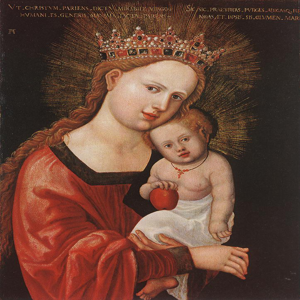

In [33]:
example = semart_train.loc[11201] # in section Select desired photo we can get id
print(example.T)
im.resize((300,300))

### Search function
**nprobe**: Number of units to query 

Search function contains different parameters:
- **embedding.numpy** : Searching the photos with created vectors
- **expr** : Creation restrictions for the photo search in specified **TYPE** and **SCHOOL** The user can insert different numbers for these two columns and get different answers
- **limit** : The number of similar photos that the machine should find as similar photos for us

In [34]:
search_params = {
    "metric_type": metric,
    "params": {"nprobe": 5},
}

result = semart_milvus.search([list(embedding.numpy())], "embeddings", search_params,
                     # expr = "(type == 5) and (school == 2) ",
                              limit=5)

### predict_images
The ID of 5 similar photos is inserted into the predict_images variable

In [35]:
predict_images = result[0].ids


In [36]:
predict_images

[11201, 9412, 16937, 4854, 4525]

**Distances**: shows distances between vectors

In [37]:
result[0].distances

[0.0, 26.224925994873047, 29.58370590209961, 30.24197769165039, 30.246498107910156]

### Display the searched points (distances) visually 

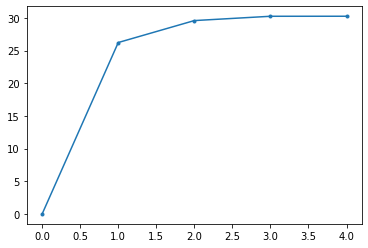

In [38]:
plt.plot(result[0].distances, marker = ".")

### Show 5 similar photos
Pyplot: Each pyplot function makes some change to a figure

Display of photos using for_loop, opening of photos and is added in xx_variable and create image using figure_function, show the photos using imshow_function

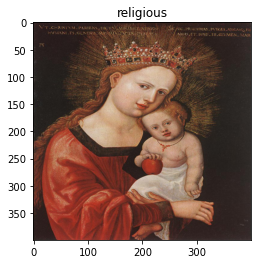

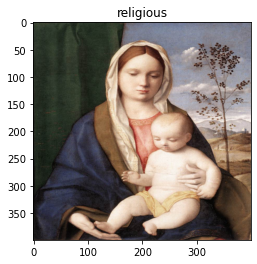

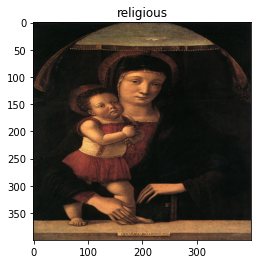

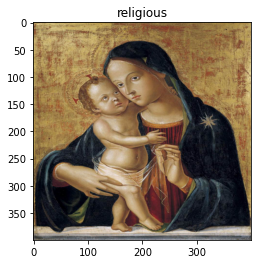

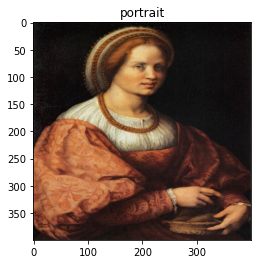

In [39]:
from  matplotlib import pyplot as plt
for ima in predict_images:
    xx = Image.open(f'images/{sm.iloc[ima].name}').resize((400,400))
    plt.figure()
    plt.imshow(xx)
    plt.title(sm.iloc[ima].TYPE)


## We tried to use both metrics (L2 and IP) separately to show the difference visually

### Drop_collection
The last collection is deleted using **drop_collection** to create a new collection to implement the new metric.

In [40]:
utility.drop_collection("semart_milvus2")

### Add new collection 
Create a new collection names fields2

In [41]:
fields2 = [
    FieldSchema(name="pk", dtype=DataType.INT64, is_primary=True, auto_id=False),
    FieldSchema(name="type", dtype=DataType.INT64),
    FieldSchema(name="school", dtype=DataType.INT64),
    FieldSchema(name="embeddings2", dtype=DataType.FLOAT_VECTOR, dim=2048)
]
schema2 = CollectionSchema(fields2,"semart images")
semart_milvus2 = Collection("semart_milvus2", schema2)

### Drop_index function
last index (index) will be deleted to create a new index (index2)

In [43]:
#semart_milvus.drop_index("embeddings")

### metric = IP as scale

In [44]:
metric = 'IP'
#metric = 'L2'
index2 = {
    "index_type": "IVF_FLAT",
    "metric_type": metric,
    "params": {"nlist": 50},
}
semart_milvus2.create_index("embeddings2", index2)

Status(code=0, message='')

### Upload new information on Milvus_Server
Other steps are repeated and described above.

In [45]:
semart_milvus2.load()

In [46]:
search_params = {
    "metric_type": metric,
    "params": {"nprobe": 5},
}

result = semart_milvus.search([list(embedding.numpy())], "embeddings", search_params,
                     # expr = "(type == 9) and (school == 2) ",
                              limit=5)

In [47]:
predict_images_IP= result[0].ids
predict_images_IP

[11201, 10256, 19225, 9016, 14801]

In [48]:
result[0].distances

[44.401859283447266, 35.129337310791016, 33.554039001464844, 33.101295471191406, 32.60261917114258]

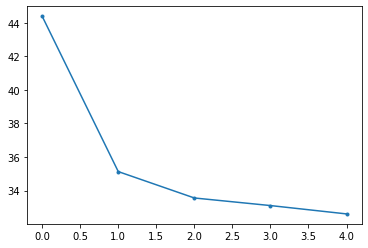

In [49]:
plt.plot(result[0].distances, marker = ".")

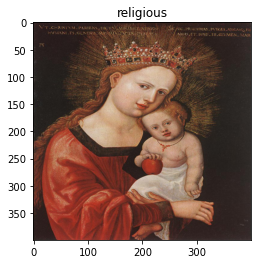

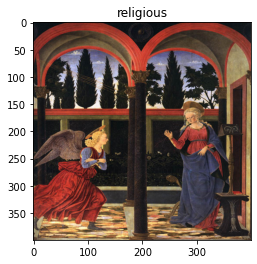

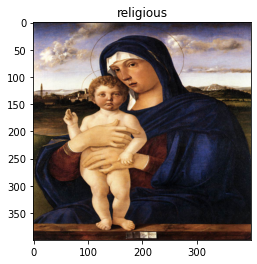

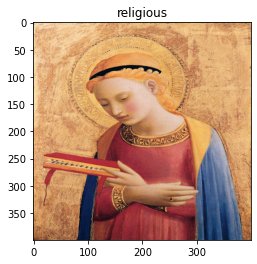

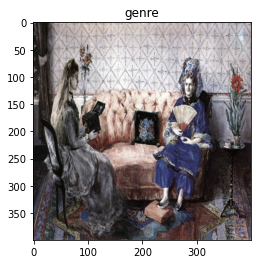

In [50]:
from  matplotlib import pyplot as plt
for ima in predict_images_IP:
    xx = Image.open(f'images/{sm.iloc[ima].name}').resize((400,400))
    plt.figure()
    plt.imshow(xx)
    plt.title(sm.iloc[ima].TYPE)


## Thank you for your attention

### Author

*   Amirhossein Roshanzadeh
*   Ahmad Baratkhooei
